In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# EDA for emotion prediction

### Data Import

Data from stage 2 (songs selected by traditional recommenders) and 3 (songs selected by the researchers' recommender). 

For this EDA, the focus is on the relationship between the features of a song and the V-A statistics for emotion detection, and the method of recommendation does not yet matter (until the recommendation problem is needed). Hence, data from both stages are concatenated into a single dataframe to increase the number of samples. 

In [ ]:
df_stage2: pd.DataFrame = pd.read_csv("/work/itunes_processed/target_difference_2.csv")
df_stage3: pd.DataFrame = pd.read_csv("/work/itunes_processed/target_difference_3.csv")
df: pd.DataFrame = pd.concat([df_stage2, df_stage3], axis=0)
df

,popularity,loudness,danceability,energy,key,speechiness,acousticness,instrumentalness,valence,tempo,...,emo_post_valence,emo_post_arousal,time,weather type,pressure,temperature,humidity,gps_speed,arousal_change,valence_change
0,22.0,-12.891,0.591,0.340,2.0,0.0298,0.600000,0.000027,0.503,126.951,...,0.437990,-0.347062,3,2,1003,24,95,0.000000,0.056438,0.115240
1,22.0,-12.891,0.591,0.340,2.0,0.0298,0.600000,0.000027,0.503,126.951,...,0.265099,-0.206316,2,0,994,30,73,0.097190,0.046184,0.062349
2,22.0,-12.891,0.591,0.340,2.0,0.0298,0.600000,0.000027,0.503,126.951,...,0.069156,-0.233082,3,1,999,24,99,0.000000,0.079418,-0.094844
3,22.0,-12.891,0.591,0.340,2.0,0.0298,0.600000,0.000027,0.503,126.951,...,0.322729,-0.335536,2,1,999,28,76,1.117141,-0.120286,-0.112771
4,22.0,-12.891,0.591,0.340,2.0,0.0298,0.600000,0.000027,0.503,126.951,...,0.530198,0.133190,3,2,994,22,97,0.000000,-0.020560,0.053698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,46.0,-5.333,0.670,0.704,6.0,0.0296,0.073400,0.000000,0.542,132.062,...,0.665553,-0.144806,1,0,998,22,42,0.000000,0.339694,0.220053
505,42.0,-4.122,0.561,0.959,10.0,0.0504,0.037500,0.907000,0.719,124.967,...,0.512392,0.192147,3,0,1007,18,42,0.000000,-0.036103,-0.030608
506,45.0,-15.978,0.469,0.363,0.0,0.0443,0.564000,0.000001,0.451,79.397,...,0.543024,0.203286,2,0,1019,18,21,0.000000,-0.325714,-0.027726
507,67.0,-5.903,0.320,0.917,9.0,0.0771,0.071700,0.000000,0.715,190.757,...,0.281259,0.144806,3,0,1019,18,21,0.000000,0.537556,0.253509


In [ ]:
df.columns

Index(['popularity', 'loudness', 'danceability', 'energy', 'key',
       'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo',
       'general_genre_id', 'duration_x', 'F0final_sma_amean',
       'F0final_sma_stddev', 'audspec_lengthL1norm_sma_stddev',
       'pcm_RMSenergy_sma_stddev', 'pcm_fftMag_psySharpness_sma_amean',
       'pcm_fftMag_psySharpness_sma_stddev', 'pcm_zcr_sma_amean',
       'pcm_zcr_sma_stddev', 'emo_pre_valence', 'emo_pre_arousal',
       'emo_post_valence', 'emo_post_arousal', 'time', 'weather type',
       'pressure', 'temperature', 'humidity', 'gps_speed', 'arousal_change',
       'valence_change'],
      dtype='object')

# EDA

## Analysis - Target

In [ ]:
targets = ["arousal_change", "valence_change", "emo_pre_arousal", "emo_post_arousal", "emo_pre_valence", "emo_post_valence"]

df_target = df[targets]
df_features = df.drop(columns=targets)

In [ ]:
display(df_features)

,popularity,loudness,danceability,energy,key,speechiness,acousticness,instrumentalness,valence,tempo,...,pcm_fftMag_psySharpness_sma_amean,pcm_fftMag_psySharpness_sma_stddev,pcm_zcr_sma_amean,pcm_zcr_sma_stddev,time,weather type,pressure,temperature,humidity,gps_speed
0,22.0,-12.891,0.591,0.340,2.0,0.0298,0.600000,0.000027,0.503,126.951,...,0.505556,0.986985,0.044349,0.104586,3,2,1003,24,95,0.000000
1,22.0,-12.891,0.591,0.340,2.0,0.0298,0.600000,0.000027,0.503,126.951,...,0.505556,0.986985,0.044349,0.104586,2,0,994,30,73,0.097190
2,22.0,-12.891,0.591,0.340,2.0,0.0298,0.600000,0.000027,0.503,126.951,...,0.505556,0.986985,0.044349,0.104586,3,1,999,24,99,0.000000
3,22.0,-12.891,0.591,0.340,2.0,0.0298,0.600000,0.000027,0.503,126.951,...,0.505556,0.986985,0.044349,0.104586,2,1,999,28,76,1.117141
4,22.0,-12.891,0.591,0.340,2.0,0.0298,0.600000,0.000027,0.503,126.951,...,0.505556,0.986985,0.044349,0.104586,3,2,994,22,97,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,46.0,-5.333,0.670,0.704,6.0,0.0296,0.073400,0.000000,0.542,132.062,...,0.729046,0.477808,0.078009,0.098214,1,0,998,22,42,0.000000
505,42.0,-4.122,0.561,0.959,10.0,0.0504,0.037500,0.907000,0.719,124.967,...,1.194335,0.918380,0.106986,0.107397,3,0,1007,18,42,0.000000
506,45.0,-15.978,0.469,0.363,0.0,0.0443,0.564000,0.000001,0.451,79.397,...,0.949614,0.948801,0.086503,0.066953,2,0,1019,18,21,0.000000
507,67.0,-5.903,0.320,0.917,9.0,0.0771,0.071700,0.000000,0.715,190.757,...,0.863890,0.753193,0.082875,0.100075,3,0,1019,18,21,0.000000


In [ ]:
display(df_target)

,arousal_change,valence_change,emo_pre_arousal,emo_post_arousal,emo_pre_valence,emo_post_valence
0,0.056438,0.115240,-0.40350,-0.347062,0.32275,0.437990
1,0.046184,0.062349,-0.25250,-0.206316,0.20275,0.265099
2,0.079418,-0.094844,-0.31250,-0.233082,0.16400,0.069156
3,-0.120286,-0.112771,-0.21525,-0.335536,0.43550,0.322729
4,-0.020560,0.053698,0.15375,0.133190,0.47650,0.530198
...,...,...,...,...,...,...
504,0.339694,0.220053,-0.48450,-0.144806,0.44550,0.665553
505,-0.036103,-0.030608,0.22825,0.192147,0.54300,0.512392
506,-0.325714,-0.027726,0.52900,0.203286,0.57075,0.543024
507,0.537556,0.253509,-0.39275,0.144806,0.02775,0.281259


<AxesSubplot: >

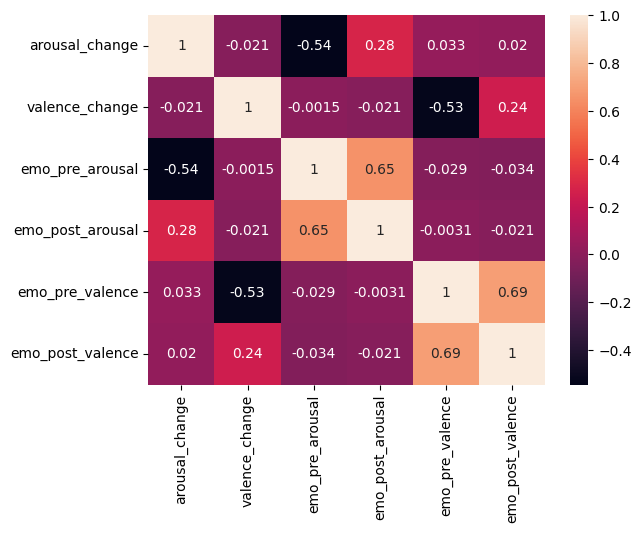

In [ ]:
# Heatmap of target variables
corr = df_target.corr(method="pearson")
sns.heatmap(corr, annot=True)

As expected, the correlation between pre and post arousal (0.65), as well as pre and post valence (0.69) is high .

In [ ]:
import matplotlib.pyplot as plt

def plot_scatter(x: pd.Series, x_ax_label: str, y: pd.Series, y_ax_label: str, label: str, y_min = -1, y_max=1, x_min=-1, x_max=1, color='b'):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.scatter(x, y,
            color=color, 
            label=label,
            marker=".")

    ax.set_ylim(ymin=y_min, ymax=y_max)
    ax.set_xlim(xmin=x_min, xmax=x_max)
    ax.grid(True)
    plt.xlabel(x_ax_label)
    plt.ylabel(y_ax_label)
    plt.legend()
    plt.show()

In [ ]:
def plot_kde(data: pd.Series, title: str, xlabel: str, ylabel: str='Density', xlim=[-1,1]):
    sns.kdeplot(data, fill=True)

    plt.xlim(xlim)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

### Univariate Analysis

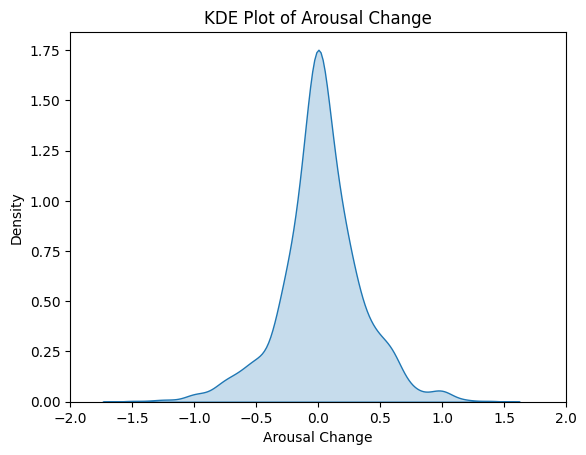

In [ ]:
plot_kde(df_target["arousal_change"], "KDE Plot of Arousal Change", xlabel="Arousal Change", xlim=[-2,2])

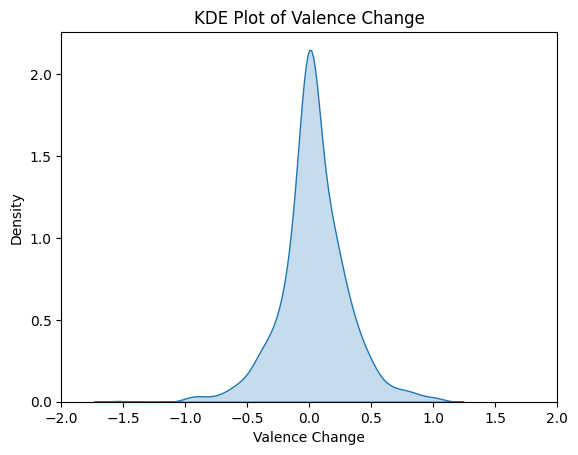

In [ ]:
plot_kde(df_target["valence_change"], "KDE Plot of Valence Change", xlabel="Valence Change", xlim=[-2,2])

Most valence and arousal change are negligible

### Bivariate Analysis

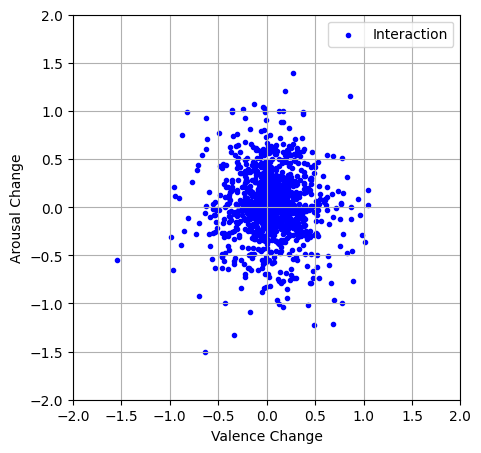

In [ ]:
plot_scatter(\
    df_target["valence_change"], 'Valence Change', 
    df_target["arousal_change"], 'Arousal Change', 
    "Interaction", y_min = -2, y_max=2, x_min=-2, x_max=2)

### Analysis between pre and post change

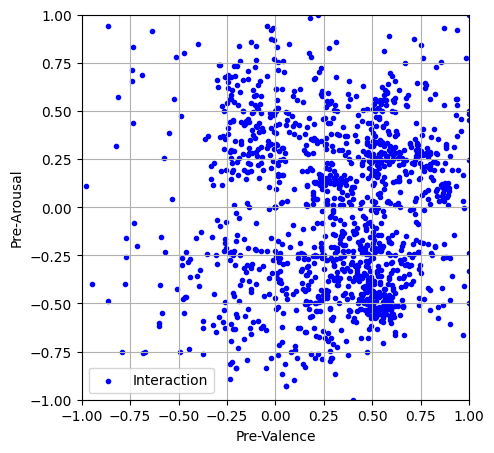

In [ ]:
plot_scatter(\
    df_target["emo_pre_valence"], 'Pre-Valence', 
    df_target["emo_pre_arousal"], 'Pre-Arousal', 
    "Interaction")

In [ ]:
def segment_quadrant(s):
    if (s["emo_pre_valence"] >= 0) and (s["emo_pre_arousal"] >= 0):
        return 1
    elif (s["emo_pre_valence"] < 0) and (s["emo_pre_arousal"] >= 0):
        return 2
    elif (s["emo_pre_valence"] < 0) and (s["emo_pre_arousal"] < 0):
        return 3
    elif (s["emo_pre_valence"] >= 0) and (s["emo_pre_arousal"] < 0):
        return 4

df_target_classified = df_target.copy()
df_target_classified['class_emo_pre'] = df_target_classified.apply(segment_quadrant, axis=1)

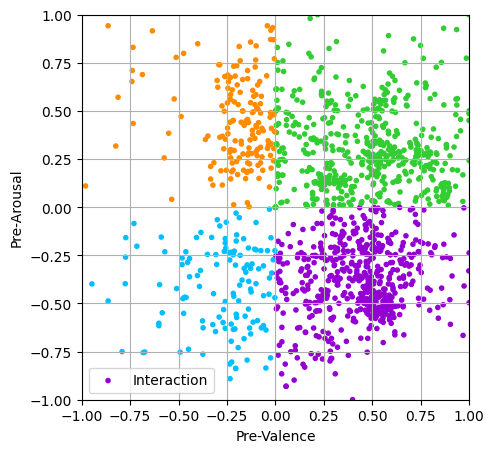

In [ ]:
colors_map = {1: "limegreen", 2: "darkorange", 3: "deepskyblue", 4:"darkviolet"}
plot_scatter(\
    df_target_classified["emo_pre_valence"], 'Pre-Valence', 
    df_target_classified["emo_pre_arousal"], 'Pre-Arousal', 
    "Interaction", color=[colors_map[name] for name in df_target_classified['class_emo_pre']])

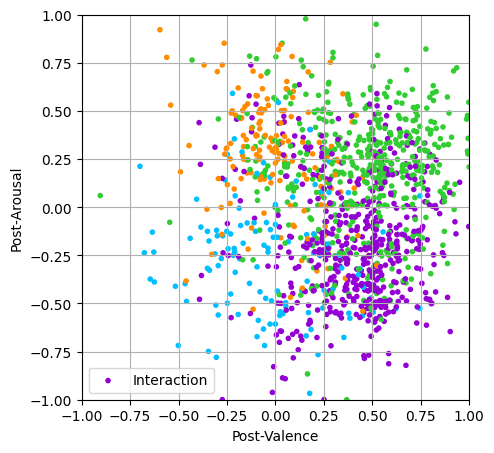

In [ ]:
colors_map = {1: "limegreen", 2: "darkorange", 3: "deepskyblue", 4:"darkviolet"}
plot_scatter(\
    df_target_classified["emo_post_valence"], 'Post-Valence', 
    df_target_classified["emo_post_arousal"], 'Post-Arousal', 
    "Interaction", color=[colors_map[name] for name in df_target_classified['class_emo_pre']])

There seems to be a shift in points from pre to post in the sense that more points are classified as having higher valence in the post compared to the pre. There is a general horizontal shift in points. 

In the vertical direction there seems to be a slight general shift in points in the upwards direction from low pre arousal to slightly higher post arousal. 

No clear trend of V-A change.  But we can conclude that generally people are slightly happier from pre to post stage.

## Analysis - Features

## Correlation Plot

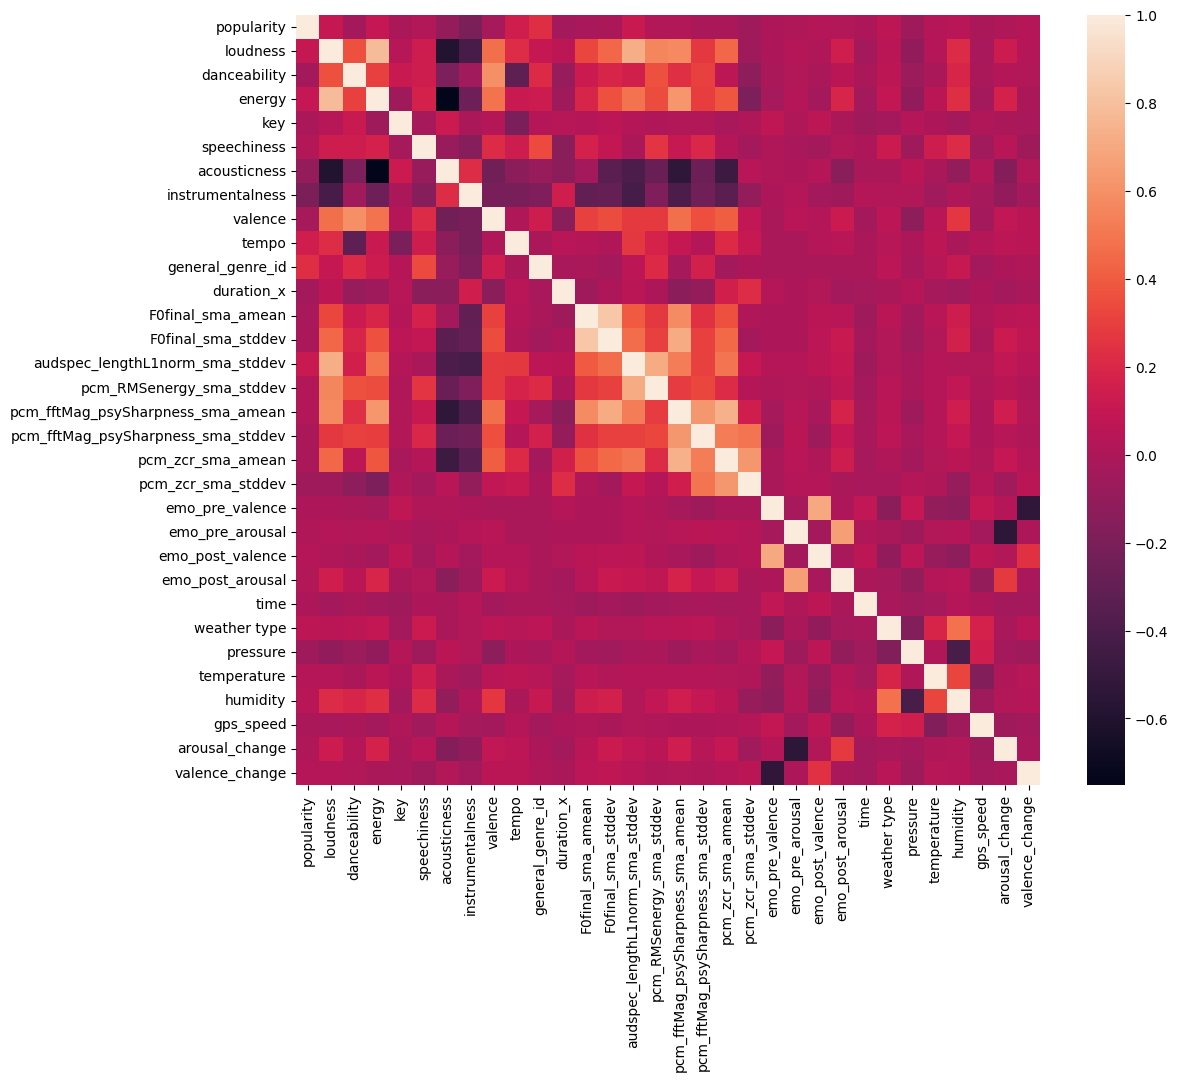

In [ ]:
%matplotlib inline

# Only provides r-coefficient, not r-squared
corr = df.corr(method="pearson")

plt.figure(figsize=(12, 10))
sns.heatmap(corr)
plt.show()

<AxesSubplot: xlabel='key', ylabel='arousal_change'>

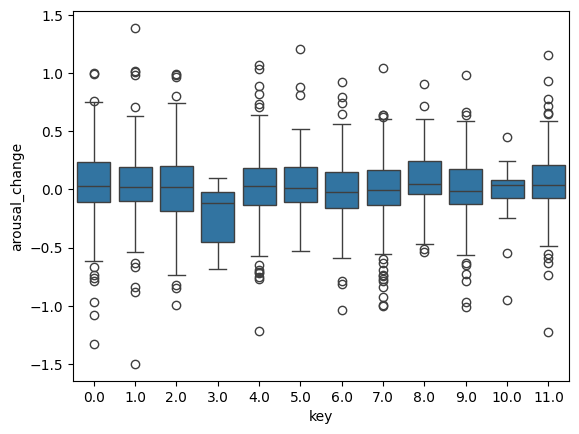

In [ ]:
sns.boxplot(data=df, x='key', y='arousal_change')

Plotting the below scatter plots, adjusting for different hues for different features, no clear pattern was observed.

In [ ]:
def plot_scatter_hued(data: pd.DataFrame, hue_column_name: str, x='arousal_change', y='valence_change'):
    sns.scatterplot(data=data, x=x, y=y, hue=hue_column_name, s=10)
    plt.legend(title=hue_column_name, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

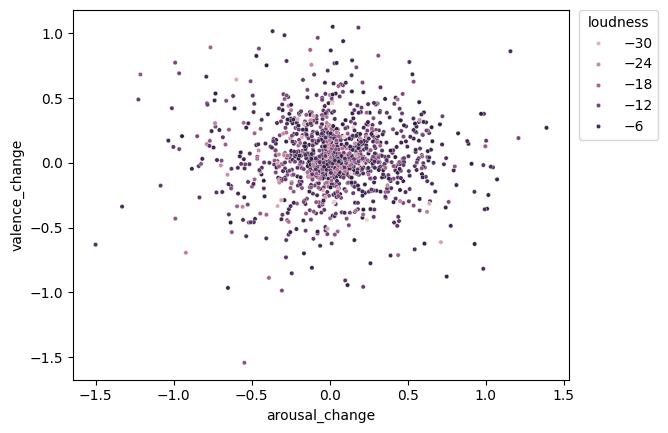

In [ ]:
plot_scatter_hued(df,"loudness")

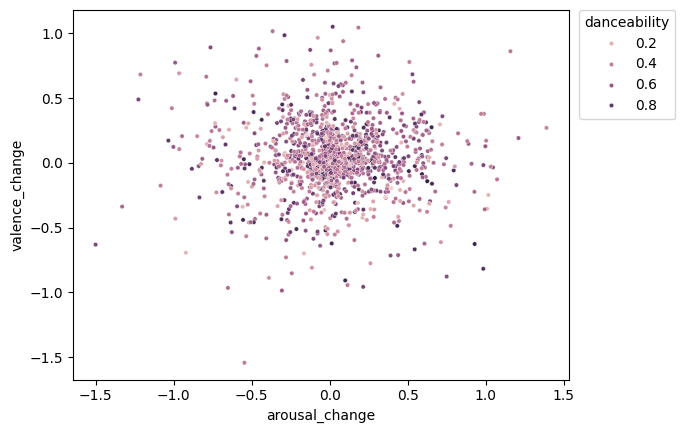

In [ ]:
plot_scatter_hued(df,"danceability")

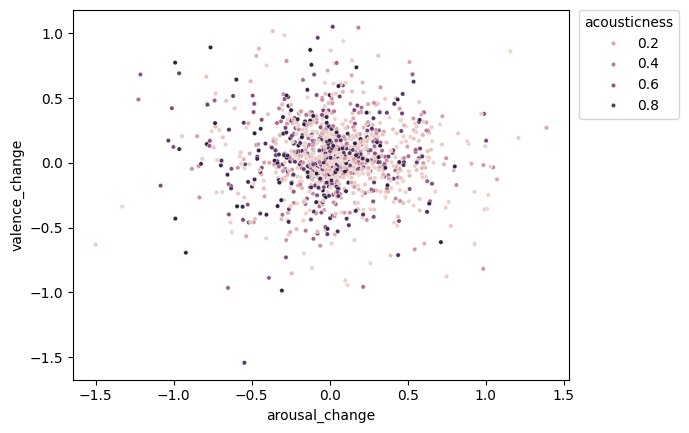

In [ ]:
plot_scatter_hued(df,"acousticness")

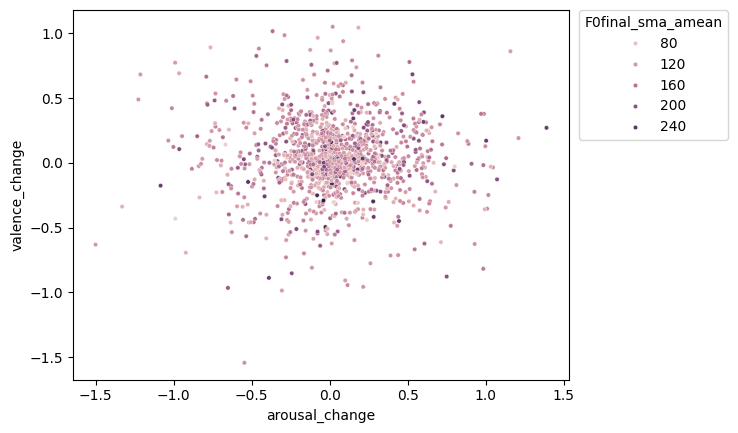

In [ ]:
plot_scatter_hued(df,"F0final_sma_amean")

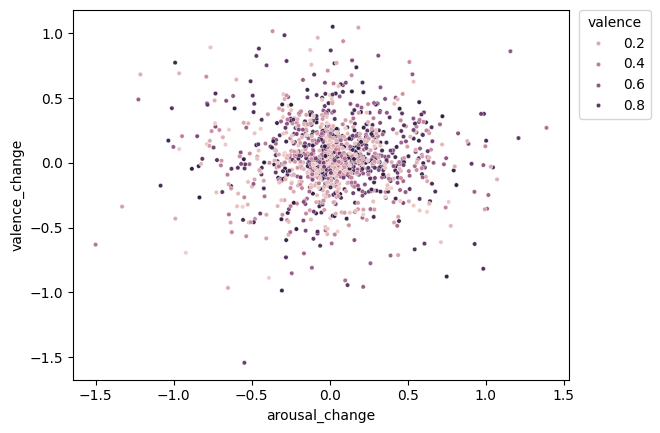

In [ ]:
plot_scatter_hued(df,"valence")
# plot_scatter_hued(df,"valence", x="emo_post_arousal", y="emo_post_valence")


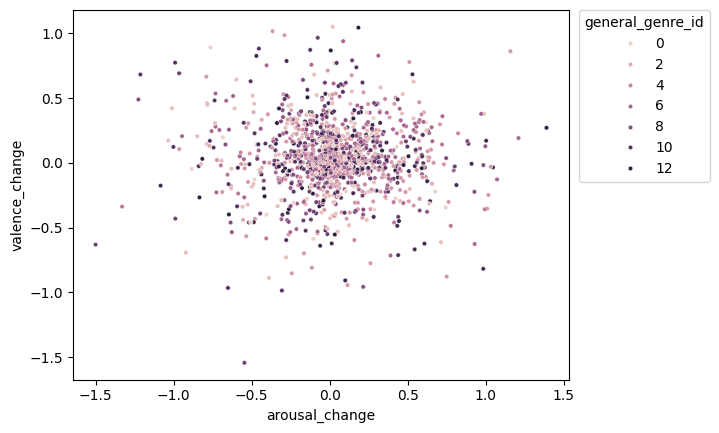

In [ ]:
plot_scatter_hued(df,"general_genre_id")


# EDA for music recommendation

<TODO> can refer to SiTunes/Experiments for inspiration

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=75e550ed-719f-4d72-aa2b-dbe53a6ba1db' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>